In [34]:
# !wget https://raw.githubusercontent.com/Topaz52/phishing-website-URL-dataset/main/combined_benign_phishing_sample%3D38400.csv

In [35]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
dataset = pd.read_csv('combined_benign_phishing_sample=38400.csv')
dataset.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Label
0,wmmayhem.com,0,0,0,0,0,0,0,0,0
1,ballymenaunitedyouthacademy.com,0,0,0,0,0,0,0,0,0
2,brusselsgaybars.com,0,0,0,0,0,0,0,0,0
3,sportsbettingtennis.net,0,0,0,0,0,0,0,0,0
4,i29.mobi,0,0,0,0,0,0,0,0,0


In [37]:
#Dropping the Domain column
data = dataset.drop(['Domain'], axis = 1).copy()

In [38]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((38800, 8), (38800,))



#  **Preprocessing**



In [39]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [40]:
# 1.Domain of the URL (Domain)
def getDomain(url):
  parsed_url = urlparse(url)
  domain = parsed_url.netloc
  return domain

In [41]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [42]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

In [43]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

In [44]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [45]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [46]:
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [47]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [48]:
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [49]:
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

In [50]:
# importing required packages for this section
import requests

In [51]:
# 10. IFrame Redirection (iFrame)
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [52]:
# 11.Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [53]:
# 12.Checks the status of the right click attribute (Right_Click)
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [54]:
# 13.Checks the number of forwardings (Web_Forwards)
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

In [55]:
# calls the other functions and stores all the features of the URL in the list. We will extract the features of each URL and append to this list.
#Function to extract features
def featureExtraction(url):

  features = []
  #Address bar based features (10)
  # features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))

  # features.append(label)

  return features



> **Random Forest**



In [56]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((31040, 8), (7760, 8))

In [57]:
# Random Forest model
#importing packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

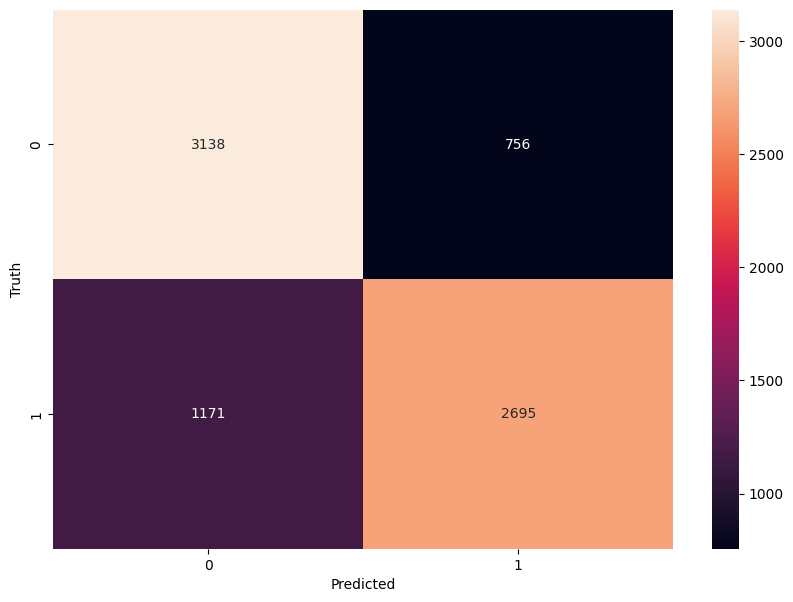

In [58]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = forest.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()


In [59]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [60]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.755
Random forest: Accuracy on test Data: 0.752


In [61]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7516752577319588


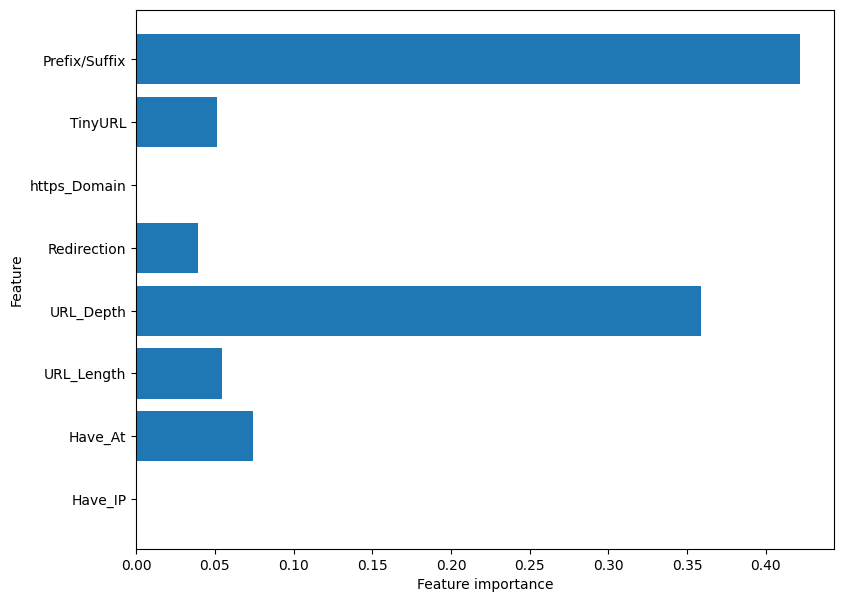

In [62]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [63]:
def predict_phishing(url, forest):
  # Extract features from the URL
  url_features = featureExtraction(url)

  # Make predictions without scaling
  prediction = forest.predict([url_features])
  if prediction >= 0.99:
      print(url, "- PHISHING: ", prediction, "acc")
  else:
    print(url, "- NOT-PHISHING: ", prediction, "acc")

  return prediction[0]

In [64]:
sample_url = "https://colab.research.google.com/drive/1PKjem7g-w4UGtRcR9JLVkpLZJWAB6F5z#scrollTo=9LN5SS85du5P"
domain_processed = getDomain(sample_url)
print(domain_processed)
prediction_result = predict_phishing(sample_url, forest)

colab.research.google.com
https://colab.research.google.com/drive/1PKjem7g-w4UGtRcR9JLVkpLZJWAB6F5z#scrollTo=9LN5SS85du5P - NOT-PHISHING:  [0] acc


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [65]:
# save RandomForestClassifier model to file
import pickle
import joblib
# save the model to a file
joblib.dump(forest, 'forest.joblib')
pickle.dump(forest, open("forest.pkl", "wb"))